#                                           Taxi-Fare Prediction

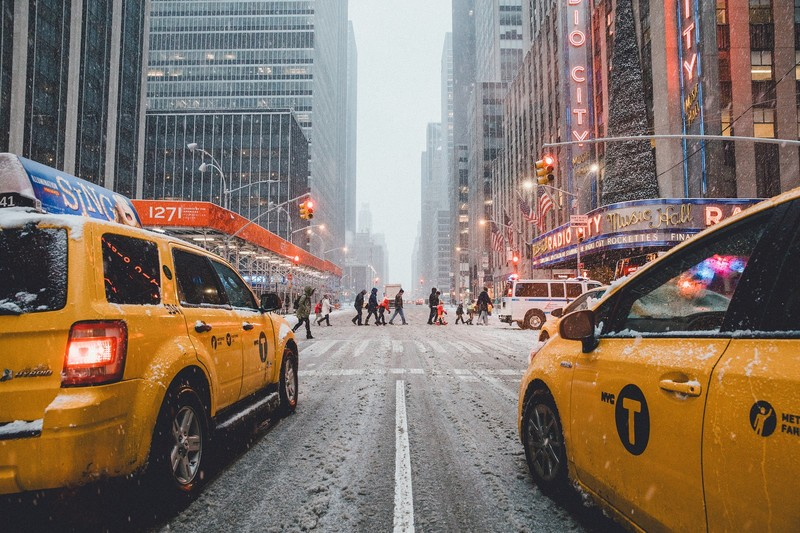

The following steps are followed in this project.





## Installing the Required Libraries

In [143]:
!pip install jovian --upgrade  --quit


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quit


In [2]:
import jovian

In [3]:
import numpy as np
import pandas as pd
import os
import opendatasets as od

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [5]:
jovian.commit('Taxi-fare-prediction')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

## Downloading the dataset

We can download the dataset from kaggle using opendatasets library. You can visit www.kaggle.com/datasets

In [6]:
od.download('https://www.kaggle.com/datasets/satyamj37/uberfareprediction')

Skipping, found downloaded files in "./uberfareprediction" (use force=True to force download)


In [7]:
file_dir = os.listdir('uberfareprediction')
file_dir

['sample_dataset.csv']

In [8]:
raw_df = pd.read_csv('./uberfareprediction/'+file_dir[0])

In [9]:
raw_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
raw_df.drop('key',axis = 1, inplace = True)

In [11]:
raw_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


For the model Training We don't have to train the entire data. Because the entire data is about 1Million records which ofen takes more time for model training. We can get the only 100000 records for the model training.

In [12]:
sample_df = raw_df[:100000].copy()

In [13]:
sample_df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
sample_df.tail(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
99995,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4
99999,5.7,2010-11-09 16:09:00 UTC,-73.975663,40.791653,-73.982267,40.774968,1


### Attribute information:
- Latitude and Longitude - Latitudes are horizontal lines that measure distance north or south of the equator. Longitudes are vertical lines that measure east or west of the meridian in Greenwich, England. Together, latitude and longitude enable cartographers, geographers and others to locate points or places on the globe.
- pickup_datatime - Time at which the taxi pick the customer.
- pickup_longitude - Longitude at which the pick the customer.
- pickup_latitude - Latitude at which the pick the customer.
- dropoff_longitude - Longitude at which taxi drops the customer.
- dropoff_latitude - Latitude at which taxi drops the customer.
- fare_amount - Total cost for the travel(Target Column)

In [15]:
jovian.commit('Taxi-fare-prediction')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

## Explodatory Data Analysis , Data preprocessing and Feature Engineering


### Data Analalysis

In [16]:
sample_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [17]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        100000 non-null  float64
 1   pickup_datetime    100000 non-null  object 
 2   pickup_longitude   100000 non-null  float64
 3   pickup_latitude    100000 non-null  float64
 4   dropoff_longitude  100000 non-null  float64
 5   dropoff_latitude   100000 non-null  float64
 6   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.3+ MB


There is no missing value in any of these columns.

In [18]:
sample_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


It seems to be there are some outliers in fare_amount column.Because fare_amount should not be negative value.
Longitude value must be in the range between -180 to 180.But in pickup_longitude column have a minimum of -736 and it clearly out of range. So it is a outliers. In data visualization part we will explore outliers in the dataframe using boxplot.

In [19]:
sample_df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008975,-0.008952,0.006322,-0.005587,0.015804
pickup_longitude,0.008975,1.000000,-0.946674,0.937559,-0.911016,-0.001342
pickup_latitude,-0.008952,-0.946674,1.000000,-0.926534,0.930183,-0.000920
dropoff_longitude,0.006322,0.937559,-0.926534,1.000000,-0.963604,-0.000380
dropoff_latitude,-0.005587,-0.911016,0.930183,-0.963604,1.000000,-0.002173
passenger_count,0.015804,-0.001342,-0.000920,-0.000380,-0.002173,1.000000


From the above table it is clear that there was strongest correlation between the colums of pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude. They are intercorrelated very well.

In [20]:
sample_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
99995,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


### Extraction time information from 'pickup_datetime' column

In [21]:
sample_df['pickup_datetime'] = pd.to_datetime(sample_df['pickup_datetime'])

In [22]:
sample_df['Year'] = pd.DatetimeIndex(sample_df['pickup_datetime']).year

In [23]:
sample_df['Month'] = pd.DatetimeIndex(sample_df['pickup_datetime']).month

In [24]:
sample_df['Day'] = pd.DatetimeIndex(sample_df['pickup_datetime']).day

In [25]:
sample_df['Hour'] = pd.DatetimeIndex(sample_df['pickup_datetime']).hour

In [26]:
sample_df['Time'] = pd.DatetimeIndex(sample_df['pickup_datetime']).time

Saving the work !!!

In [27]:
jovian.commit('taxi-fare-prediction')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

We have extracted time information from 'pickup_datetime' columns. Now it is okay to remove the column from the dataframe.

In [28]:
sample_df.drop('pickup_datetime',axis = 1,inplace = True)

In [29]:
sample_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,2011.74389,6.261230,15.664270,13.495110
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,1.86602,3.450569,8.677631,6.507434
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,2009.00000,1.000000,1.000000,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,2010.00000,3.000000,8.000000,9.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,2012.00000,6.000000,16.000000,14.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,2013.00000,9.000000,23.000000,19.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,2015.00000,12.000000,31.000000,23.000000


#### Removing the outliers:

In [30]:
sample_df = sample_df[sample_df['fare_amount'] > 0]
sample_df = sample_df[sample_df['pickup_longitude'] > -180 ]
sample_df = sample_df[sample_df['pickup_latitude'] < 90]
sample_df = sample_df[sample_df['dropoff_latitude'] < 90]

### Feature Engineering

From pickup_longitude,pickup_latitude,dropoff_longitude and dropoff_latitude we can calculate the travel distance.
We can create a function to calculate the travelled_distance.

In [31]:
import math
from math import radians, cos, sin, asin, sqrt

In [32]:
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [33]:
sample_df['Travelled_distance(km)'] = [distance(i,j,k,l) for i,j,k,l in zip(sample_df.pickup_latitude,sample_df.dropoff_latitude,sample_df.pickup_longitude,sample_df.dropoff_longitude)]

In [34]:
sample_df['Travelled_distance(km)'] = np.round(sample_df['Travelled_distance(km)'],3)

In [35]:
sample_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Time,Travelled_distance(km)
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,17:26:21,1.031
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,16:52:16,8.450
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,00:35:00,1.390
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,04:30:42,2.799
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,07:51:00,1.999
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,7,07:39:00,1.608
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,12,12:15:45,1.693
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,17,17:40:43,0.425
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,23,23:35:00,1.159


Let's save the work !!!

In [36]:
jovian.commit('taxi-fare-prediction')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

### Data visualization:

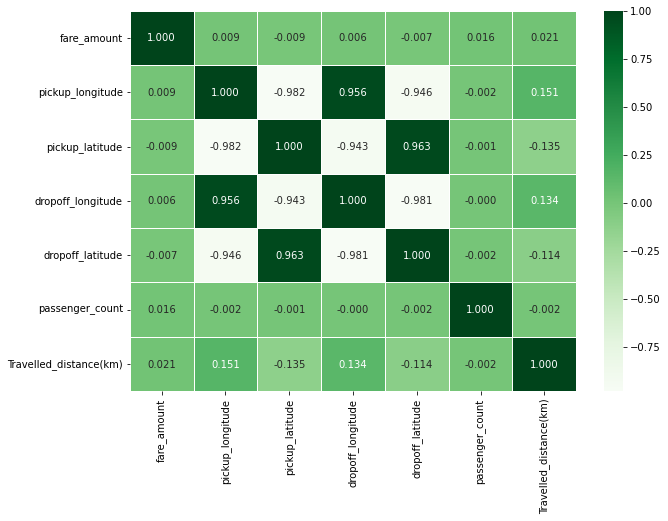

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(sample_df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count','Travelled_distance(km)']].corr(),
        cmap = 'Greens',
        annot = True,
        fmt = '.3f',
        linewidths=.5);

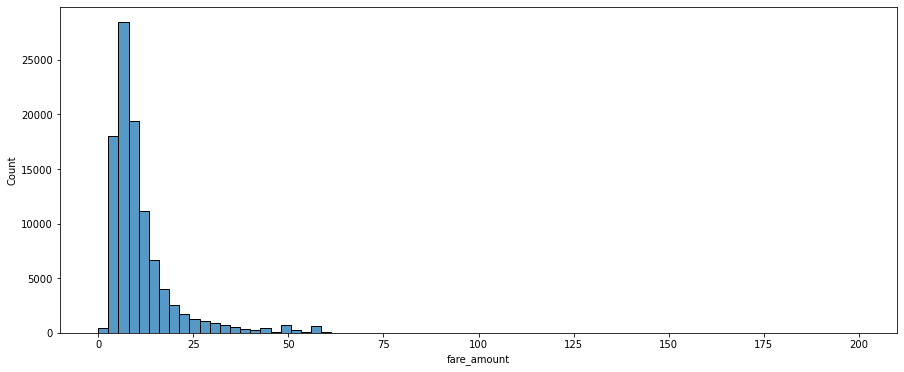

In [38]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'fare_amount',data = sample_df,bins = 75,palette='mako');

From the above graph,we could find that fare_amount is right skewed. Most of the fare_amount lies between 0 to 25.

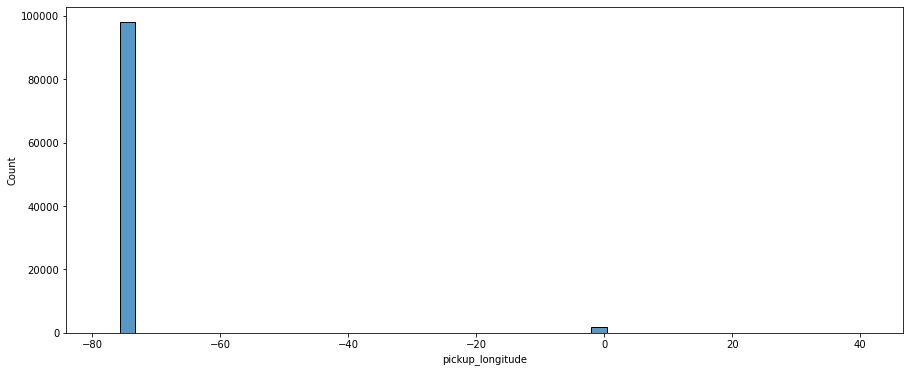

In [39]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'pickup_longitude',data = sample_df,bins = 50);

The above graph shows that the pickup_longitude only lies between the range -70 to -75 and -5 to 5.

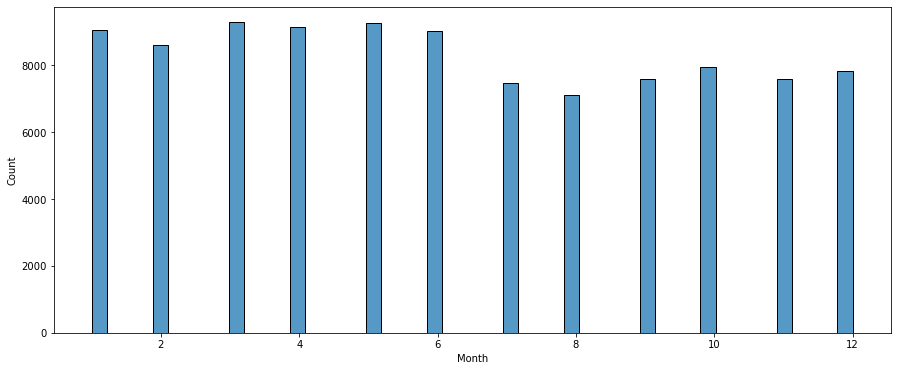

In [40]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'Month',data = sample_df,bins = 50);

Above graph shows that there are more travels happend in the first half of the year than the second half.

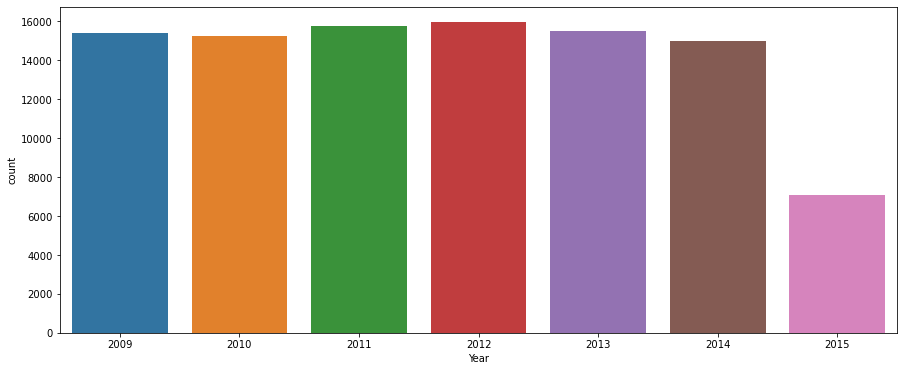

In [41]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Year',data = sample_df);

From the above graph we can conclude that there were less travels happened in the year 2015. That may be due to some reason.

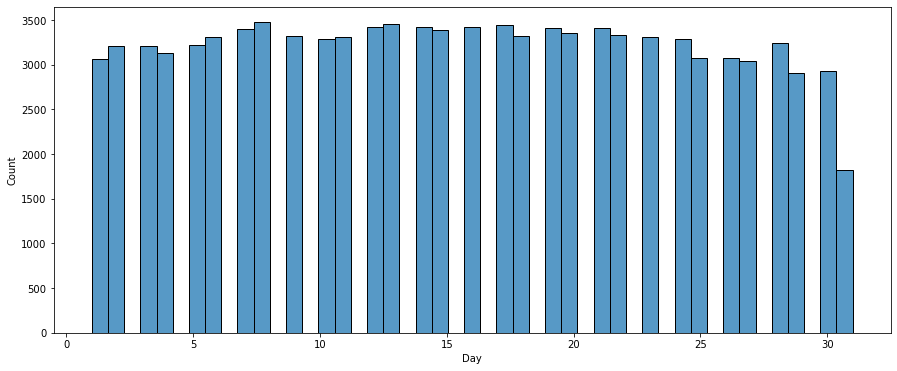

In [42]:
plt.figure(figsize = (15,6))
sns.histplot(x = 'Day',data = sample_df);

The above graphs shows that, at the end of everymonth there were less number peopled called the taxi.

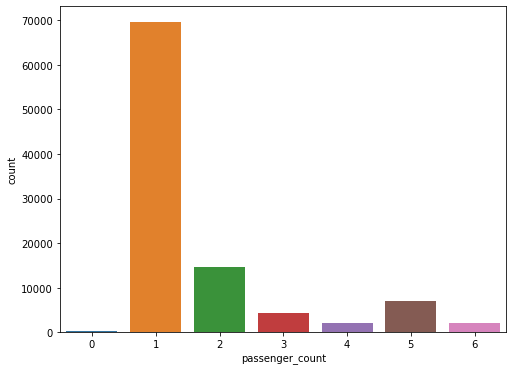

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'passenger_count',data = sample_df);

Above graph shows that most of the people travelled lonely in taxi. We often see that there are some travel records with 0 passenger_count. That seems to the outliers of the data. So we can remove the outliers.

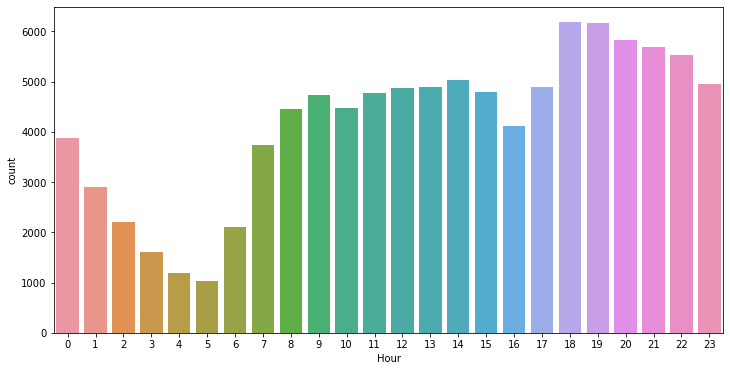

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Hour',data = sample_df);

The graph shows that Taxis are more active in the evening time and night time(from 6.pm to 11.pm)

In [45]:
sample_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Time,Travelled_distance(km)
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,17:26:21,1.031
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,16:52:16,8.450
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,00:35:00,1.390
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,04:30:42,2.799
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,07:51:00,1.999
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,7,07:39:00,1.608
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,12,12:15:45,1.693
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,17,17:40:43,0.425
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,23,23:35:00,1.159


In [46]:
sample_df = sample_df[sample_df['passenger_count']!=0]

In [47]:
sample_df['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4])

Outliers were removed.

Let's save the work !!!

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

In [49]:
sample_df[sample_df['Travelled_distance(km)']>100]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Time,Travelled_distance(km)
472,2.5,0.000000,0.000000,-74.005433,40.726685,2,2009,2,22,22,22:48:00,8667.305
1260,5.7,-73.973907,40.754743,0.000000,0.000000,2,2011,3,10,20,20:25:00,8665.269
2280,8.9,-73.936667,40.757815,0.000000,40.757815,1,2011,8,29,8,08:24:00,6026.494
2397,45.0,0.000000,0.000000,-74.010230,40.714553,2,2012,6,24,17,17:11:10,8667.454
4278,7.0,-73.972702,40.757423,0.000000,0.000000,1,2015,4,7,23,23:33:02,8665.224
...,...,...,...,...,...,...,...,...,...,...,...,...
98360,8.9,-1.383332,40.808887,-73.978395,40.779790,1,2012,7,13,17,17:01:00,5921.327
98596,19.0,0.000000,0.000000,-73.959900,40.801250,1,2014,7,20,4,04:26:00,8665.063
98652,10.5,-78.083332,40.705727,-74.005315,40.728592,1,2011,5,3,7,07:45:00,343.670
99532,8.9,-73.978523,69.400000,-73.955138,40.779992,1,2012,6,25,18,18:44:00,3182.400


From the above record, we can conclude that still there some outliers in the data. Because in the Travelled_distance column we can see that there are some records which have more than 100 kilometers which seems to be not true. Because people often don't travel in taxi for 100 kilometers. So we can take those records as outliers. We we can remove that.

In [50]:
sample_df = sample_df[sample_df['Travelled_distance(km)'] < 100]

In [51]:
sample_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Time,Travelled_distance(km)
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,17:26:21,1.031
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,16:52:16,8.450
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,00:35:00,1.390
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,04:30:42,2.799
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,07:51:00,1.999
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,7,07:39:00,1.608
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,12,12:15:45,1.693
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,17,17:40:43,0.425
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,23,23:35:00,1.159


In [52]:
sample_df = sample_df[sample_df['Travelled_distance(km)']<50]

In [53]:
sample_df[sample_df['Travelled_distance(km)'] == 0].shape[0]

2953

The above information says that there are 2953 records which have 0 Travelled_distance.It seems to not possible for any record to have 0 Travelled_distance. So, the we can remove those records from the raw data.

In [54]:
sample_df = sample_df[sample_df['Travelled_distance(km)']  != 0]
sample_df.shape

(96440, 12)

In [55]:
sample_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Time,Travelled_distance(km)
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,17:26:21,1.031
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,16:52:16,8.450
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,00:35:00,1.390
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,04:30:42,2.799
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,07:51:00,1.999
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,7,07:39:00,1.608
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,2014,5,15,12,12:15:45,1.693
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,2015,2,19,17,17:40:43,0.425
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,2009,10,10,23,23:35:00,1.159


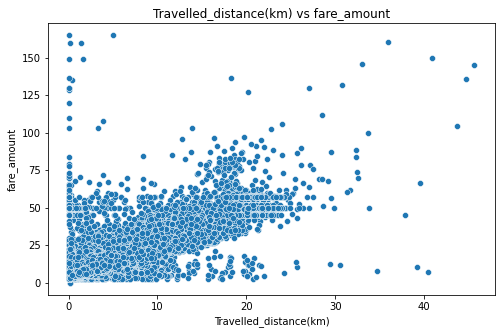

In [56]:
plt.figure(figsize = (8,5))
plt.title('Travelled_distance(km) vs fare_amount')
sns.scatterplot(x = 'Travelled_distance(km)',y = 'fare_amount',data = sample_df );

There is linear correlation between the 'fare_amount' and 'Travelled_distance(km)'.

In [57]:
cols = sample_df.columns.tolist()
for i in cols:
    print(f'Max val of "{i}" is :',sample_df[i].max())
    print(f'Min val of "{i}" is :',sample_df[i].min(),'\n')

Max val of "fare_amount" is : 165.0
Min val of "fare_amount" is : 0.01 

Max val of "pickup_longitude" is : 40.787575
Min val of "pickup_longitude" is : -75.414728173543 

Max val of "pickup_latitude" is : 42.160275
Min val of "pickup_latitude" is : -74.00766999999999 

Max val of "dropoff_longitude" is : 40.851027
Min val of "dropoff_longitude" is : -75.3545589179 

Max val of "dropoff_latitude" is : 42.168717
Min val of "dropoff_latitude" is : -74.006377 

Max val of "passenger_count" is : 6
Min val of "passenger_count" is : 1 

Max val of "Year" is : 2015
Min val of "Year" is : 2009 

Max val of "Month" is : 12
Min val of "Month" is : 1 

Max val of "Day" is : 31
Min val of "Day" is : 1 

Max val of "Hour" is : 23
Min val of "Hour" is : 0 

Max val of "Time" is : 23:59:57
Min val of "Time" is : 00:00:00 

Max val of "Travelled_distance(km)" is : 45.644
Min val of "Travelled_distance(km)" is : 0.001 



Now the Data Analysis and data preparation steps are completed. So we will use the train_test_split method to split the data for training, validation and testing part.

### Splitting the data for prediction

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
input_data = sample_df[['pickup_longitude',
                        'pickup_latitude',
                        'dropoff_longitude',
                        'dropoff_latitude',
                        'passenger_count',
                        'Year',
                        'Month',
                        'Day',
                        'Travelled_distance(km)',
                        'Hour']]
target_col = 'fare_amount'

In [60]:
train_input_df , test_input_df , train_target_df , test_target_df = train_test_split(input_data,
                                                                                     sample_df[target_col],
                                                                                     test_size= 0.2,
                                                                                     random_state= 42)

In [61]:
print(f'Size of the train input data is {train_input_df.shape}')
print(f'Size of the train target data is {train_target_df.shape}')
print(f'Size of the test input data is {test_input_df.shape}')
print(f'Size of the test target data is {test_target_df.shape}')

Size of the train input data is (77152, 10)
Size of the train target data is (77152,)
Size of the test input data is (19288, 10)
Size of the test target data is (19288,)


Spliting the input data for training set and validation set.

In [62]:
train_df ,val_df , train_tar_df, val_tar_df = train_test_split(train_input_df,train_target_df,test_size=0.2,random_state=42)

let's save the work !!!

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

## Prediction

### 1.LinearRegression( )

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
linear_model = LinearRegression()

In [67]:
linear_model.fit(train_df,train_tar_df)

LinearRegression()

In [68]:
pred = linear_model.predict(train_df)

In [69]:
loss = mean_squared_error(pred,train_tar_df,squared = False)
print(f'Loss for the training set is {round(loss,3)} ')

Loss for the training set is 4.56 


In [70]:
pred_val = linear_model.predict(val_df)

In [71]:
loss_ = mean_squared_error(pred_val,val_tar_df,squared = False)
print(f'Loss for the validation set is {round(loss_,3)}')

Loss for the validation set is 4.697


Linear Model nearly predict the target well with the training set as well as validation set. Now we will predict the target using DecisionTreeRegressor() model.

In [72]:
score = linear_model.score(val_df,val_tar_df)
print(f'Validation score of LinearRegression() is {round(score,3)*100}% ')

Validation score of LinearRegression() is 74.9% 


In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

### 2.DecisionTreeRegressor( )

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree_model = DecisionTreeRegressor()

In [76]:
tree_model.fit(train_df,train_tar_df)

DecisionTreeRegressor()

In [77]:
pred = tree_model.predict(train_df)

In [78]:
train_rmse = mean_squared_error(pred,train_tar_df,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 0.0 


In [79]:
pred1 = tree_model.predict(val_df)

In [80]:
val_rmse = mean_squared_error(pred1,val_tar_df,squared = False)
print(f'RMSE for the validation set is {round(val_rmse,3)} ')

RMSE for the validation set is 5.323 


In [81]:
from sklearn.tree import plot_tree,export_text

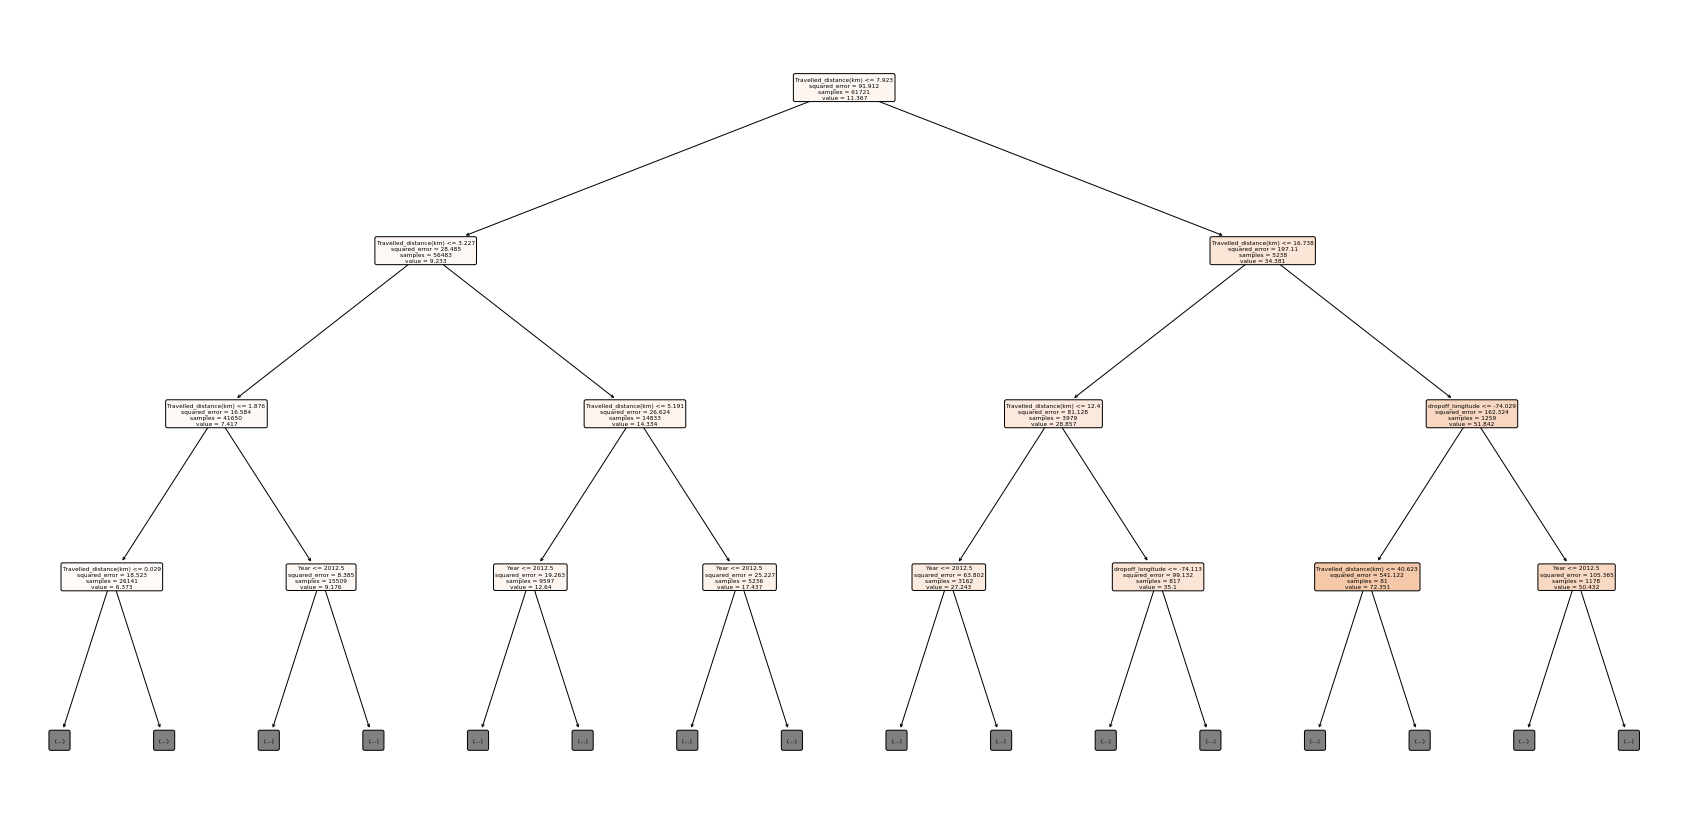

In [82]:
plt.figure(figsize = (30,15))
plot_tree(tree_model,feature_names = train_df.columns.to_list(),max_depth = 3 ,filled = True,rounded = True);

In [83]:
feature_importances = tree_model.feature_importances_
feature_importances_df = pd.DataFrame({'feature':train_df.columns,
                                       'importances': feature_importances}).sort_values('importances',ascending = False)

In [84]:
feature_importances_df

,feature,importances
8,Travelled_distance(km),0.797117
2,dropoff_longitude,0.046909
0,pickup_longitude,0.039404
3,dropoff_latitude,0.029249
5,Year,0.027280
1,pickup_latitude,0.019125
9,Hour,0.017350
6,Month,0.010245
7,Day,0.009064
4,passenger_count,0.004257


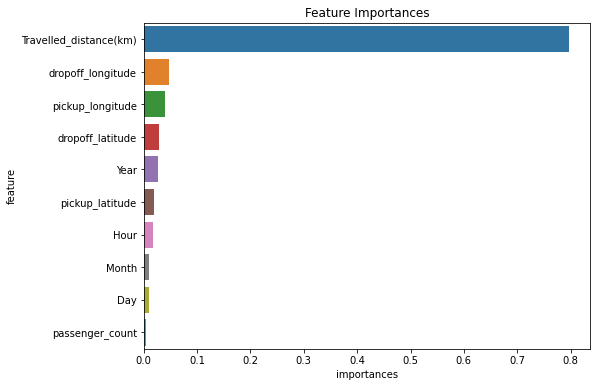

In [85]:
plt.figure(figsize = (8,6))
plt.title('Feature Importances')
sns.barplot(y = 'feature',x = 'importances',data = feature_importances_df);

Note that we created the feature called Travelled_distance(km) which is very important feature for the prediction.

The above graphs shows that Travelled_distance plays a major role in predicting the fare price.


Let's save the work !!!

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

#### Parameter tuning

In [87]:
def test_parameters(**params):
    model = DecisionTreeRegressor(**params).fit(train_df,train_tar_df)
    train_rmse = mean_squared_error(model.predict(train_df),train_tar_df,squared = False)
    val_rmse = mean_squared_error(model.predict(val_df),val_tar_df,squared = False)
    return train_rmse,val_rmse    

In [88]:
test_parameters(max_depth = 7,min_samples_split = 38)

(3.790229530006436, 4.19758947511308)

In [89]:
tuned_model = DecisionTreeRegressor(max_depth = 7 , min_samples_split = 38).fit(train_df,train_tar_df)

In [90]:
score = tuned_model.score(val_df,val_tar_df)
print(f'Validation score of LinearRegression() is {round(score,3)*100} %. ')

Validation score of LinearRegression() is 80.0 %. 


max_depth = 7 and min_samples_split = 38 seems to the best parameters for this model.

### 3.RandomForestRegressor ( )

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
forest_model = RandomForestRegressor(n_jobs = -1,random_state = 42)

In [93]:
forest_model.fit(train_df,train_tar_df)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [94]:
train_pred = forest_model.predict(train_df)

In [95]:
train_rmse = mean_squared_error(train_pred,train_tar_df,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 1.435 


In [96]:
val_pred = forest_model.predict(val_df)

In [97]:
val_rmse = mean_squared_error(val_pred,val_tar_df,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 4.007 


RandomForestRegressor model predicts the target value better than the LinearRegression and DecisionTreeRegressor model with the parameter tuning.

In [98]:
features = forest_model.feature_importances_

In [99]:
features_df = pd.DataFrame({'Features':train_df.columns,
                             'Importances':features}).sort_values('Importances',ascending = False)
features_df

,Features,Importances
8,Travelled_distance(km),0.801765
2,dropoff_longitude,0.046673
0,pickup_longitude,0.034563
3,dropoff_latitude,0.029667
5,Year,0.024492
1,pickup_latitude,0.019215
9,Hour,0.015204
6,Month,0.012691
7,Day,0.011743
4,passenger_count,0.003987


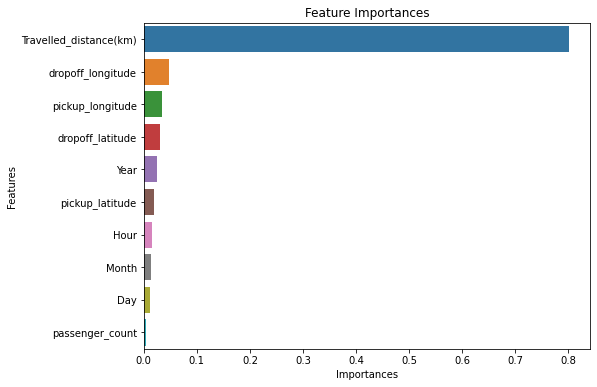

In [100]:
plt.figure(figsize = (8,6))
plt.title('Feature Importances')
sns.barplot(x = 'Importances',y = 'Features',data = features_df);

In RandomForestRegression model also, Travelled_distance(km) plays a major role in predicting the fare_amount. 

#### Parameter Tuning

In [101]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_df, train_tar_df)
    train_rmse = mean_squared_error(model.predict(train_df), train_tar_df, squared=False)
    val_rmse = mean_squared_error(model.predict(val_df), val_tar_df, squared=False)
    return train_rmse, val_rmse

In [102]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

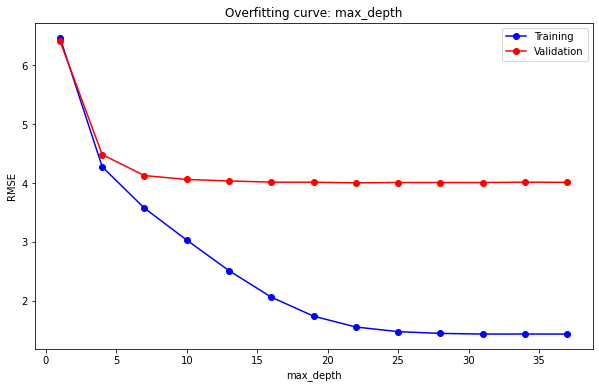

In [103]:
test_param_and_plot('max_depth',[i for i in range(1,40,3)])

The above graphs shows that best value for the parameter 'max_depth' is 7.

In [104]:
test_params(max_depth = 7)

(3.5725664381295874, 4.12677450331708)

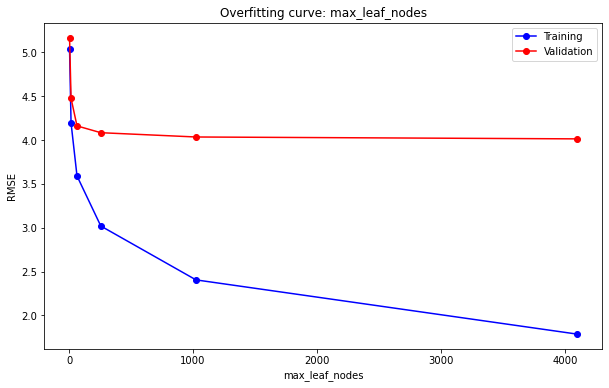

In [105]:
test_param_and_plot('max_leaf_nodes',[2**i for i in range(2,14,2)])

Best value for parameter is 2**10. 

In [106]:
test_params(max_leaf_nodes = 2**10)

(2.40437838283614, 4.035088603477013)

In [107]:
test_params(n_estimators = 100)

(1.4354424666913317, 4.006906623123369)

In [108]:
score = forest_model.score(val_df,val_tar_df)
print(f'Validation score of LinearRegression() is {round(score,3)*100} %. ')

Validation score of LinearRegression() is 81.8 %. 


### 4.XGBRegressor ( )

In [109]:
!pip install xgboost

In [110]:
from xgboost import XGBRegressor

In [111]:
xgb_model = XGBRegressor(random_state = 42,n_jobs = -1)

In [112]:
xgb_model.fit(train_df,train_tar_df)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [113]:
train_rmse = mean_squared_error(xgb_model.predict(train_df),train_tar_df,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 2.411 


In [114]:
val_rmse = mean_squared_error(xgb_model.predict(val_df),val_tar_df,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 3.943 


#### Parameter Tuning

In [115]:
def testing_parameter(**params):
    model = XGBRegressor(random_state = 42,n_jobs = -1, **params).fit(train_df,train_tar_df)
    train_rmse = mean_squared_error(model.predict(train_df),train_tar_df,squared = False)
    val_rmse = mean_squared_error(model.predict(val_df),val_tar_df,squared = False)
    return train_rmse,val_rmse

In [116]:
def test_params_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = testing_parameter(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

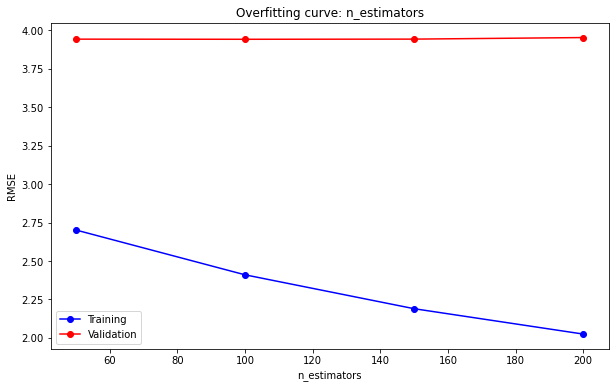

In [117]:
test_params_and_plot('n_estimators',[50,100,150,200])

The above shows that n_estimators doesn't have a big impact on the xgbregressor model.

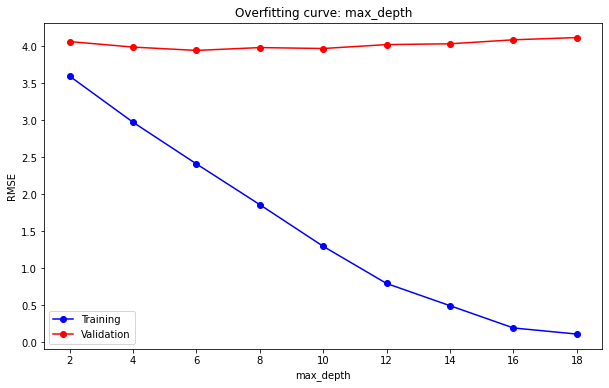

In [118]:
test_params_and_plot('max_depth',[i for i in range(2,20,2)])

max_depth also doesn't have a huge impact on the model.
It seems like the default parameters of the XGBRegressor() model predicts well on the validation set.

In [119]:
score = xgb_model.score(val_df,val_tar_df)
print(f'Validation score of LinearRegression() is {round(score,3)*100} %. ')

Validation score of LinearRegression() is 82.3 %. 


In [121]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

### Perfomance on the Test Set

In [122]:
def performance_(model):
    return round(model.score(test_input_df,test_target_df)*100,3)
    

In [123]:
models = [linear_model,tree_model,forest_model,xgb_model]

In [124]:
performance = [performance_(i) for i in models]

In [125]:
performance_df = pd.DataFrame({'Models' : ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor'],
                                'Performance':performance}).sort_values('Performance',ascending = False)

In [126]:
performance_df

,Models,Performance
2,RandomForestRegressor,85.191
3,XGBRegressor,85.032
0,LinearRegression,78.802
1,DecisionTreeRegressor,68.955


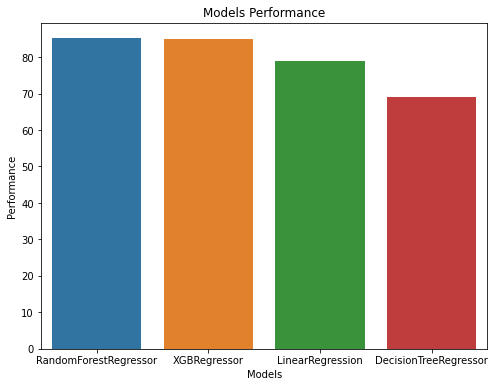

In [127]:
plt.figure(figsize = (8,6))
plt.title('Models Performance')
sns.barplot(y = 'Performance',x = 'Models',data = performance_df);

In [128]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

### Prediction on new inputs

In [129]:
new_input = pd.DataFrame({'pickup_longitude' : -73.985678,
                          'pickup_latitude' : 40.748398,
                          'dropoff_longitude': -73.985054,
                          'dropoff_latitude':40.758692,
                          'passenger_count':3,
                          'Year':2010,
                          'Month':10,
                          'Day':22,
                          'Travelled_distance(km)': round(distance(40.748398,40.758692,-73.985678,-73.985054),3),
                          'Hour':8},
                           index = [0]
                           )

In [130]:
new_input

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Travelled_distance(km),Hour
0,-73.985678,40.748398,-73.985054,40.758692,3,2010,10,22,1.146,8


In [131]:
Models_ = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']

In [132]:
i = 0
for model in models:
    print(f'Prediction for the input data using {Models_[i]} is $ {round(model.predict(new_input)[0],4)} ')
    i += 1

Prediction for the input data using LinearRegression is $ 5.4389 
Prediction for the input data using DecisionTreeRegressor is $ 4.1 
Prediction for the input data using RandomForestRegressor is $ 6.044 
Prediction for the input data using XGBRegressor is $ 6.631100177764893 


In [133]:
sample_df[(sample_df['Travelled_distance(km)'] > 1) & (sample_df['Travelled_distance(km)'] < 1.2) & (sample_df['passenger_count'] == 3)].drop(columns = 'Time').head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Travelled_distance(km)
51,5.5,-73.952825,40.772048,-73.952194,40.781152,3,2012,10,6,20,1.014
1240,5.7,-73.988081,40.723888,-73.980452,40.716858,3,2011,5,14,3,1.012
2553,6.5,-73.964448,40.765992,-73.974980,40.770377,3,2010,11,9,17,1.012
3097,5.7,-74.004778,40.746890,-73.991280,40.750075,3,2009,8,16,23,1.191
3666,4.9,-73.985866,40.726905,-73.993730,40.718490,3,2011,4,3,15,1.147


From the above information we can say that the models are predicting the 'fare_amount' well.

Let's save the work !!!

In [134]:
input_cols = train_df.columns.to_list()
target_col = ['fare_amount']

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'

### Saving and Loading Trained Model

In [136]:
import joblib

In [137]:
taxi_fare_linear_model = { 
                          'model' : linear_model,
                          'input_cols' : input_cols,
                          'target_col' : target_col,
                          }

In [138]:
joblib.dump(taxi_fare_linear_model , 'LinearRegression.joblib')

['LinearRegression.joblib']

In [139]:
linear_regression = joblib.load('LinearRegression.joblib')

In [140]:
linear_regression['model'].score(test_input_df,test_target_df)

0.7880228938866001

## Summary and References

- The following model are trained to predict the fare amount for taxis.         
         1. LinearRegresson()
         2. DecisionTreeRegressor()
         3. RandomForestRegressor()
         4. XGBRegressor()
- The dataset used in this project can be downloaded from the following link https://www.kaggle.com/datasets/satyamj37/uberfareprediction.
          

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rajesh99ed/taxi-fare-prediction" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rajesh99ed/taxi-fare-prediction


'https://jovian.com/rajesh99ed/taxi-fare-prediction'